## 3 影像強度(Intensity Transform)

### 3.1 Gamma校正     

人眼對外界光源的感光值與輸入光強不是呈線性關係的，而是呈指數型關係的    
在低亮度下，人眼更容易分辨出亮度的變化    
隨著照度的增加，人眼不易分辨出亮度的變化    
攝像機感光與輸入光強呈線性關係

https://kknews.cc/zh-tw/code/r62qkkx.html


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190721174818/log-transformation.png" width=300>   

### matplotlib 繪圖

https://steam.oxxostudio.tw/category/python/example/matplotlib-index.html

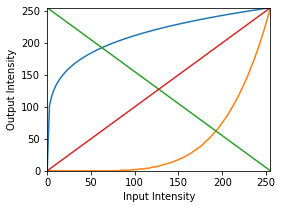

In [1]:
import numpy as np
import matplotlib.pyplot as plt

gamma1 = 0.2
gamma2 = 5.0

c1 = 255.0 / ( 255.0 ** gamma1 )
c2 = 255.0 / ( 255.0 ** gamma2 )

x  = np.linspace( 0, 255, 100 )

y1 = x ** gamma1 * c1
y2 = np.uint8(255*np.power(x/255, gamma2))
y3 = 255 - x
y4 = x

plt.figure(figsize=(4, 3))
plt.plot( x, y1, x, y2, x, y3, x, y4 )
plt.xlabel( "Input Intensity" )
plt.ylabel( "Output Intensity" )
plt.xlim( [0,255] )
plt.ylim( [0,255] )
plt.savefig('gamma.png')
plt.show( )


### <font color="Red">3.2 Gamma校正 程式設計</font>
<font color="Red"> 1. 先建立浮點數的影像矩陣     
    2. 再使用 np.power(image,gamma) 進行 gamma 計算
    
https://makeronsite.com/opencv-python-use-gamma-correction.html
    

3


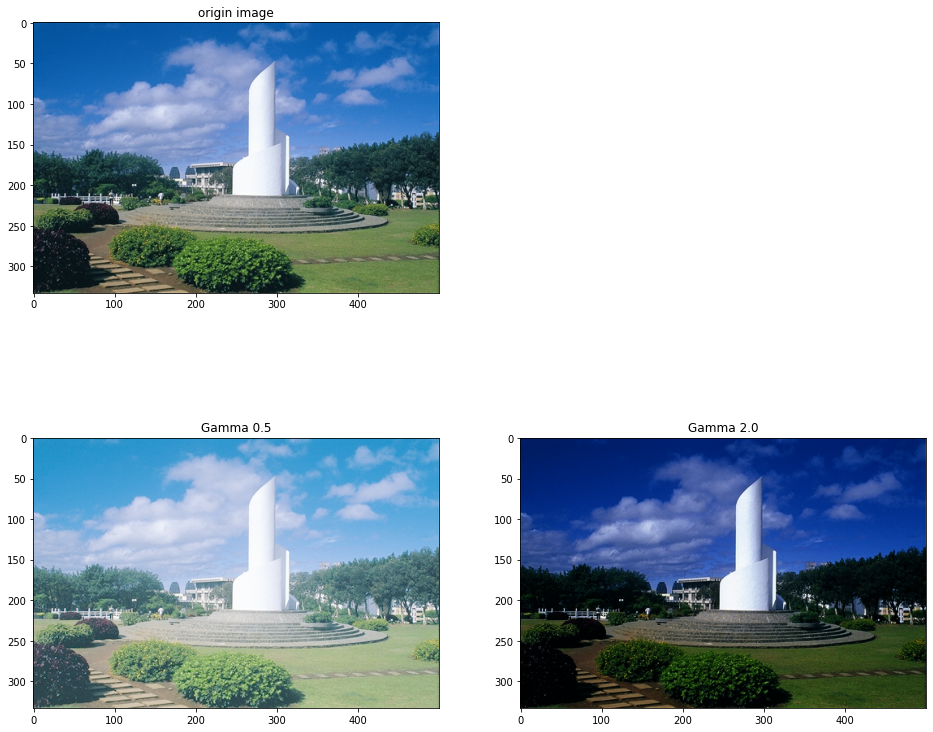

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gamma_correction( f, gamma = 2.0 ):
#------------------- Code Here ------------------#     
    g = np.uint8(255*np.power(f/255.0, gamma))
#------------------- Stop Here ------------------#     
    return g

def main( ):
    imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
    img = imgBGR[:,:,::-1]
    print(img.ndim)
    img1 = gamma_correction( img, 0.5 )
    img2 = gamma_correction( img, 2.0 )
    plt.figure(figsize=(16, 14))
    plt.subplot(2,2,1)   
    plt.title('origin image') 
    plt.imshow(img)
    plt.subplot(2,2,3)     
    plt.title('Gamma 0.5') 
    plt.imshow(img1)
    plt.subplot(2,2,4)     
    plt.title('Gamma 2.0') 
    plt.imshow(img2)
     
main( )

### 3.3 Beta Function
相異於 gamma 的 beta，可以使用 scipy 的函數        
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.betainc.html">  special.betainc </a>

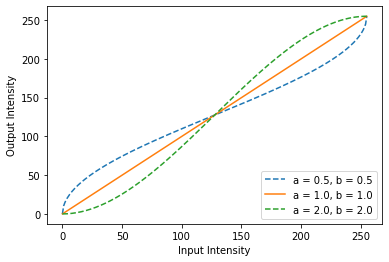

In [3]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

x = np.linspace( 0, 1, 256 )
x1 = x * 255
y1 = special.betainc( 0.5, 0.5, x ) * 255
y2 = x1
y3 = special.betainc( 2.0, 2.0, x ) * 255

plt.plot( x1, y1, '--', label = 'a = 0.5, b = 0.5' )
plt.plot( x1, y2, '-',  label = 'a = 1.0, b = 1.0' )
plt.plot( x1, y3, '--', label = 'a = 2.0, b = 2.0' )
plt.xlabel( 'Input Intensity' )
plt.ylabel( 'Output Intensity' )
plt.legend( loc = 'lower right' )

plt.show( )

  
### <font color="Red">3.4 應用 Beta Correcrtion 到影像中</font>
<font color="Red">1. 先利用 special.betainc 設定對應函數t     
2. 再利用 t[f] 應用到影像 f 中

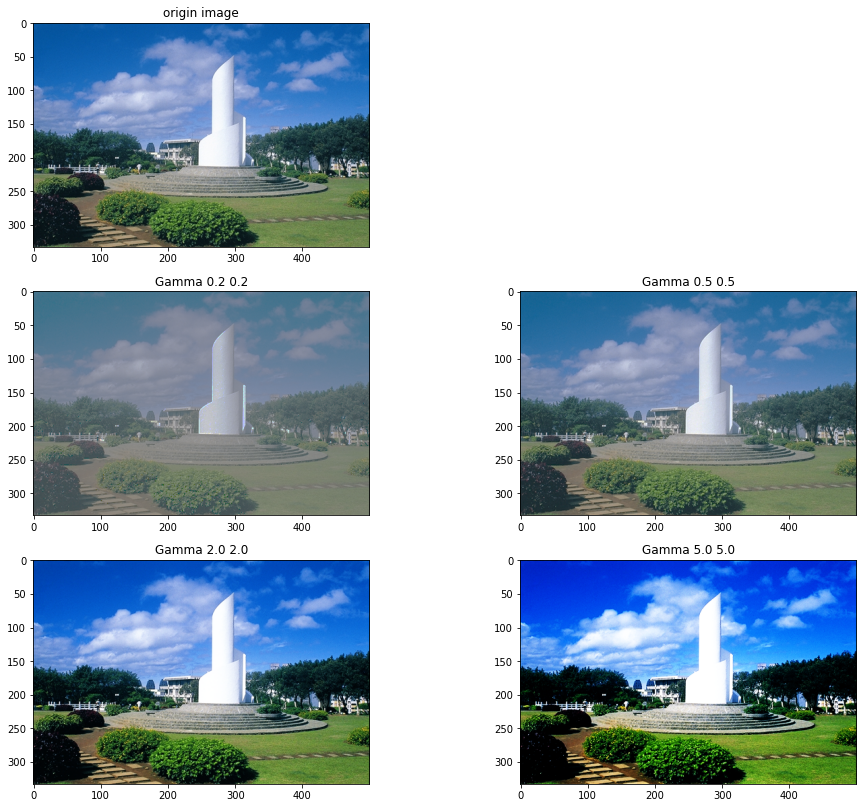

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.special as special
def beta_correction( f, a = 2.0, b = 2.0 ):
#------------------- Code Here ------------------#  
    g = np.uint8(np.clip(np.round(special.betainc(a, b, np.linspace(0, 1, 256)) * 255, 0)[f], 0, 255))
#------------------- Stop Here ------------------#
    return g

def main( ):
    imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
    img = imgBGR[:,:,::-1]
    img1 = beta_correction( img, a = 0.2, b = 0.2 )
    img2 = beta_correction( img, a = 0.5, b = 0.5 )
    img3 = beta_correction( img, a = 2.0, b = 2.0 )
    img4 = beta_correction( img, a = 5.0, b = 5.0 )

    plt.figure(figsize=(16, 14))
    plt.subplot(3,2,1)   
    plt.title('origin image') 
    plt.imshow(img)
    plt.subplot(3,2,3)     
    plt.title('Gamma 0.2 0.2') 
    plt.imshow(img1)
    plt.subplot(3,2,4)     
    plt.title('Gamma 0.5 0.5') 
    plt.imshow(img2)
    plt.subplot(3,2,5)     
    plt.title('Gamma 2.0 2.0') 
    plt.imshow(img3)
    plt.subplot(3,2,6)     
    plt.title('Gamma 5.0 5.0') 
    plt.imshow(img4)
    
main( )

### <font color="Red">3.5 調整影像的對比和亮度

<font color="Red">轉換公式如下：     
new_image = (old_image) × (contrast/127 + 1) - contrast + brightness 

<font color="Red">利用調整 contrast (對比) 和 brightness (亮度) 參數值，能改變影像的對比度和亮度

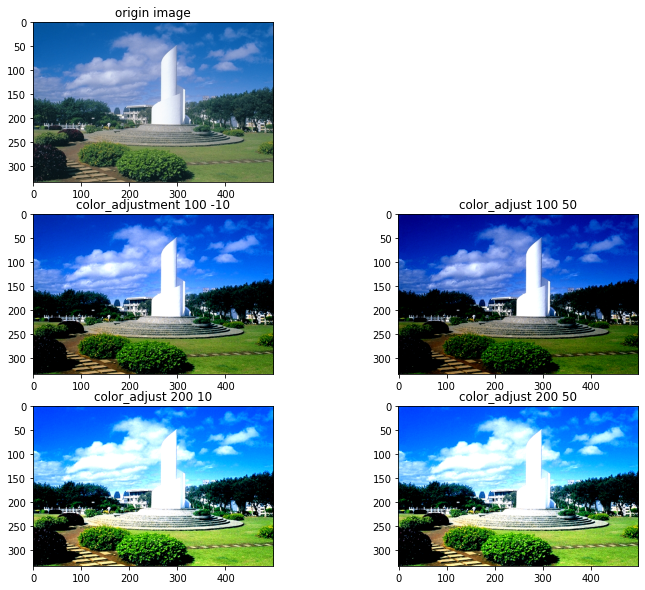

In [11]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

def color_adjustment( f, contrast, brightness ):
#------------------- Code Here ------------------#      
    n = f/255.0
    g = f*(contrast/127 + 1) - contrast + brightness
#------------------- Stop Here ------------------#  
    g = np.clip(g, 0, 255)
    g = np.uint8(g)
    return g

def main( ):
    imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
    img = imgBGR[:,:,::-1]
    img1 = color_adjustment( img, 100, -10 )
    img2 = color_adjustment( img, 100, -50)  
    img3 = color_adjustment( img, 200, 10) 
    img3 = color_adjustment( img, 200, 50)     
    plt.figure(figsize=(12, 10))
    plt.subplot(3,2,1)   
    plt.title('origin image') 
    plt.imshow(img)
    plt.subplot(3,2,3)     
    plt.title('color_adjustment 100 -10') 
    plt.imshow(img1)
    plt.subplot(3,2,4)     
    plt.title('color_adjust 100 50') 
    plt.imshow(img2)
    plt.subplot(3,2,5)     
    plt.title('color_adjust 200 10') 
    plt.imshow(img3)
    plt.subplot(3,2,6)     
    plt.title('color_adjust 200 50') 
    plt.imshow(img3)    
main( )

### <font color="Red"> 3.6 Histogram <p>
<a href="https://jason-chen-1992.weebly.com/home/-histogram-equalization">  影像直方圖與直方圖均化</a>    

<a href="https://blog.gtwang.org/programming/python-opencv-matplotlib-plot-histogram-tutorial/">  指令：cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍) </a> 
    
<font color="Red"> 下列程式提供彩色的處理方式，請完成灰階影像的程式   

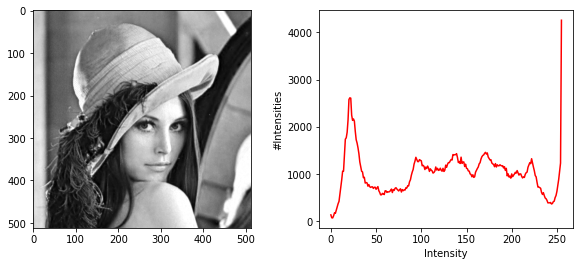

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram( f ):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)          
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2) 
    if f.ndim == 3:
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( [f], [i], None, [256], [0,256] )
            plt.plot( hist, color = col)
            plt.xlim( [0,256] )
    else:
#------------------- Code Here ------------------#  
        hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
        plt.plot(hist, color = 'r')
#------------------- Stop Here ------------------#          
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )

def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    # imgBGR = cv2.imread( "Commons.jpeg", -1 )
    # img = imgBGR[:,:,::-1]
    histogram( img )

main( )

### 3.7 灰色影像直方圖均化(Histogram Equalization)
<a href="https://jason-chen-1992.weebly.com/home/-histogram-equalization">  影像直方圖均化</a>    

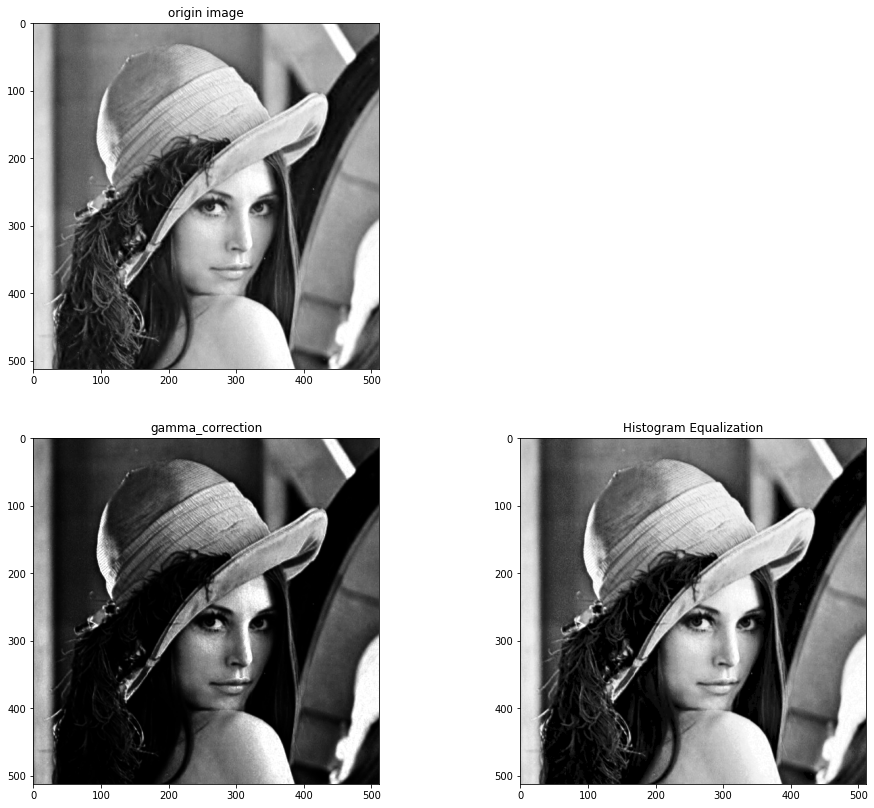

In [14]:
import numpy as np
import cv2
    
img = cv2.imread( "Lenna.bmp", -1 )
img1 = gamma_correction( img, 2.5 )
img2 = cv2.equalizeHist( img1 )

plt.figure(figsize=(16, 14))
plt.subplot(2,2,1)   
plt.title('origin image') 
plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(2,2,3)   
plt.title('gamma_correction') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,2,4)   
plt.title('Histogram Equalization') 
plt.imshow(img2, cmap=plt.cm.gray)

### <font color="Red"> 3.8 彩色影像直方圖均化(Histogram Equalization)
<font color="Red"> 延續3.7的灰色影像直方圖均化    
擴展至彩色影像直方圖均化上    

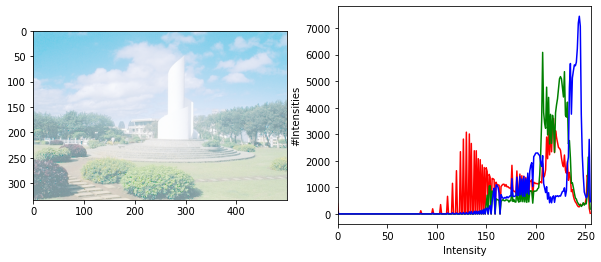

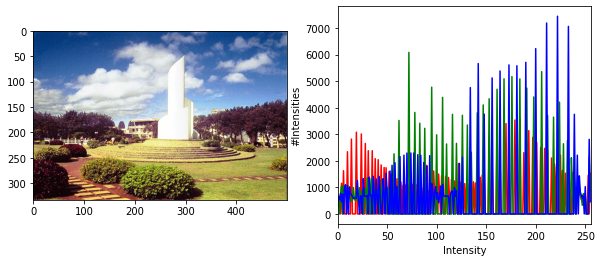

In [15]:
import numpy as np
import cv2

def histogram( f ):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)          
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2) 
    if f.ndim == 3:
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( [f], [i], None, [256], [0,256] )
            plt.plot( hist, color = col)
            plt.xlim( [0,256] )       
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )
    
imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
img = gamma_correction(img, 0.2)
histogram( img )  
#------------------- Code Here ------------------# 
img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
#------------------- Stop Here ------------------# 
histogram( img )  


### 3.9 影像模糊


blur(3,3) 平均模糊的例子    
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ExWYZTbJ7f6p6pvdg8RkWA.png">

   
<a href="https://steam.oxxostudio.tw/category/python/ai/opencv-blur.html">  影像模糊</a>  
<a href="https://www.youtube.com/watch?app=desktop&v=07qT2L1ZKQA"> 平均率波器影片 </a>

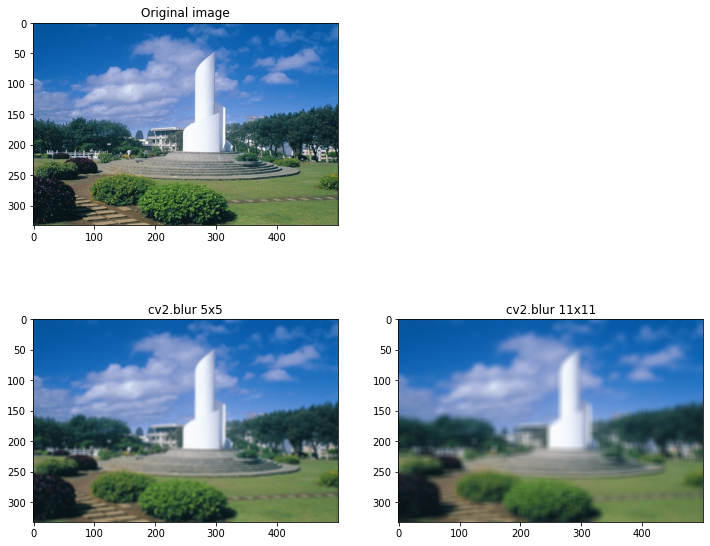

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = cv2.blur( img1, ( 5, 5 ) )
img3 = cv2.blur( img1, ( 11, 11 ) )
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)     
plt.title('Original image') 
plt.imshow(img1)
plt.subplot(2,2,3)     
plt.title('cv2.blur 5x5') 
plt.imshow(img2)
plt.subplot(2,2,4)     
plt.title('cv2.blur 11x11') 
plt.imshow(img3)

###   3.10 影像模糊
cv2.GaussianBlur(img, ksize, sigmaX, sigmaY)     
img 來源影像       
ksize 指定區域單位 ( 必須是大於 1 的奇數 )     
sigmaX  X方向標準差，預設 0，sigmaY  Y方向標準差，預設 0         
    
<img src="https://miro.medium.com/v2/resize:fit:4192/format:webp/1*PaZx8eCc7bWaERP6eP5JjA.png" width=600>  


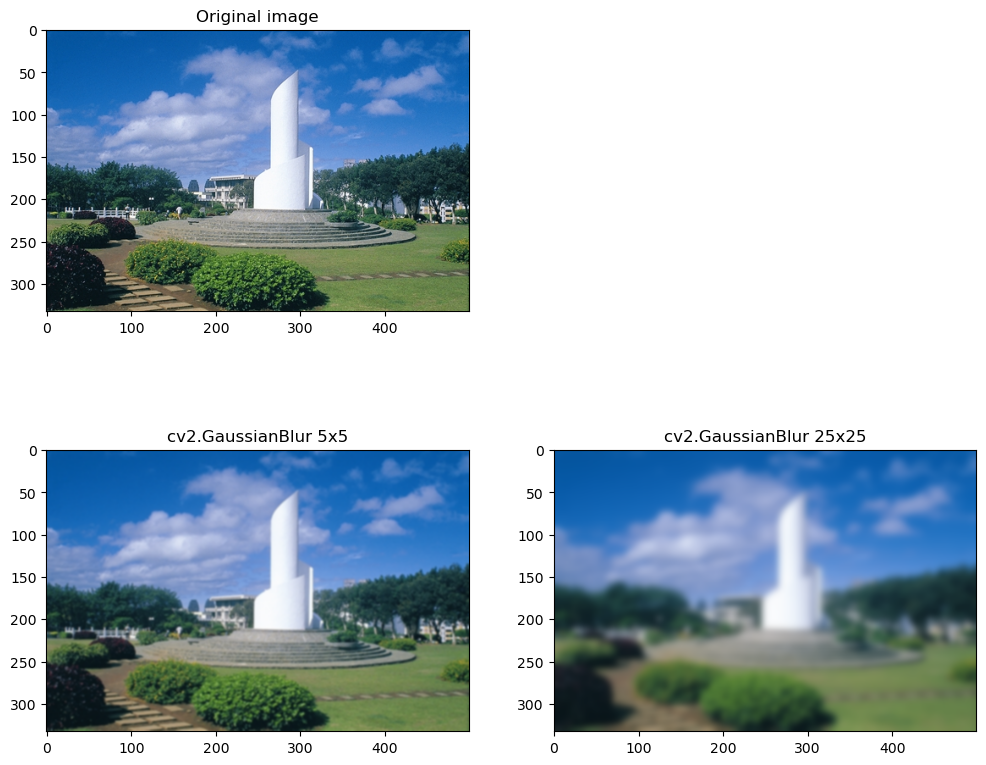

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = cv2.GaussianBlur(img1, (5, 5), 0) 
img3 = cv2.GaussianBlur(img1, (25, 25), 0) 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)     
plt.title('Original image') 
plt.imshow(img1)
plt.subplot(2,2,3)     
plt.title('cv2.GaussianBlur 5x5') 
plt.imshow(img2)
plt.subplot(2,2,4)     
plt.title('cv2.GaussianBlur 25x25') 
plt.imshow(img3)

###  3.11 影像模糊
cv2.medianBlur(img, ksize)       
img 來源影像       
ksize 模糊程度 ( 必須是大於 1 的奇數 )             
<a href="https://www.youtube.com/watch?v=eJx3g-ZEfm4"> 中值率波器影片(4:15開始) </a>

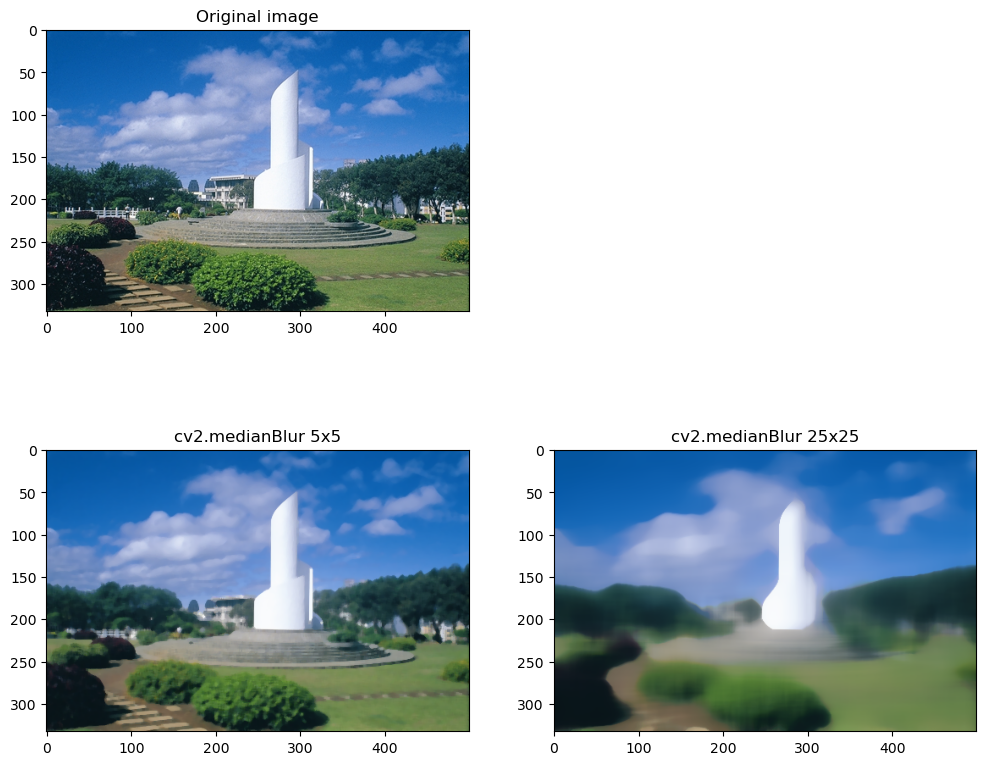

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = cv2.medianBlur(img1, 5)
img3 = cv2.medianBlur(img1, 25)
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)     
plt.title('Original image') 
plt.imshow(img1)
plt.subplot(2,2,3)     
plt.title('cv2.medianBlur 5x5') 
plt.imshow(img2)
plt.subplot(2,2,4)     
plt.title('cv2.medianBlur 25x25') 
plt.imshow(img3)

###  <font color="Red"> 3.11 影像模糊的比較
    
    
<font color="Red"> 請比較下列不同模糊方法在 7x7  15x15 的過濾結果    
blur() 平均模糊    
GaussianBlur() 高斯模糊     
medianBlur() 中值模糊      
<a href="https://steam.oxxostudio.tw/category/python/ai/opencv-blur.html">  影像模糊</a>     

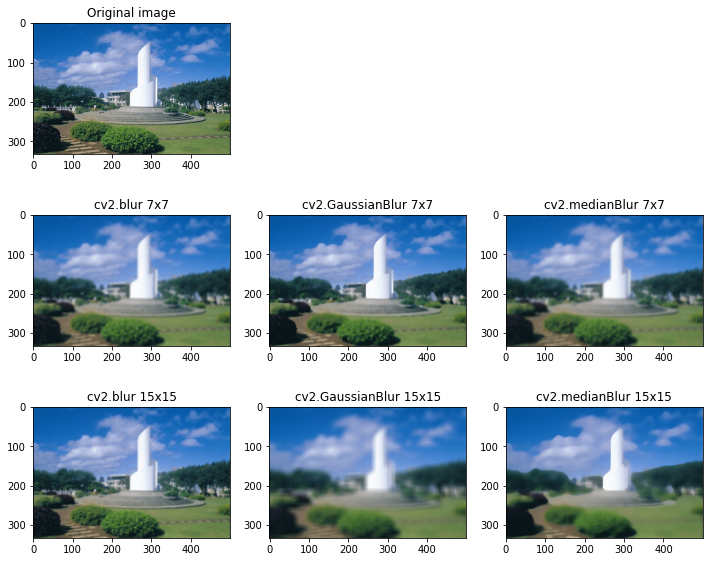

In [18]:
imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
#------------------- Code Here ------------------# 
img2 = cv2.blur( img1, ( 7, 7 ) )
img3 = cv2.GaussianBlur(img1, (7, 7), 0) 
img4 = cv2.medianBlur(img1, 7)
img5 = cv2.blur( img1, ( 15, 15 ) )
img6 = cv2.GaussianBlur(img1, (15, 15), 0) 
img7 = cv2.medianBlur(img1, 15)
#------------------- Stop Here ------------------# 
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)     
plt.title('Original image') 
plt.imshow(img1)
plt.subplot(3,3,4)     
plt.title('cv2.blur 7x7') 
plt.imshow(img2)
plt.subplot(3,3,7)     
plt.title('cv2.blur 15x15') 
plt.imshow(img3)
plt.subplot(3,3,5)     
plt.title('cv2.GaussianBlur 7x7') 
plt.imshow(img4)
plt.subplot(3,3,8)     
plt.title('cv2.GaussianBlur 15x15') 
plt.imshow(img5)
plt.subplot(3,3,6)     
plt.title('cv2.medianBlur 7x7') 
plt.imshow(img6)
plt.subplot(3,3,9)     
plt.title('cv2.medianBlur 15x15') 
plt.imshow(img7)

### 3.12 影像邊緣偵測

<img src="https://docs.juliahub.com/ImageEdgeDetection/5h14T/0.1.0/images/demo1.jpg" width=300>

<img src="https://docs.juliahub.com/ImageEdgeDetection/5h14T/0.1.0/images/demo2.jpg" width=300>

### Sobel 邊緣偵測

<img src="https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/sobmasks.gif" width=300>

#### cv2.Sobel(img, ddepth, dx, dy, ksize, scale)
img 來源影像    
dx 針對 x 軸抓取邊緣    
dy 針對 y 軸抓取邊緣    
ddepth 影像深度，設定 -1 表示使用圖片原本影像深度    
ksize 運算區域大小，預設 1 ( 必須是正奇數 )    
scale 縮放比例常數，預設 1 ( 必須是正奇數 )    

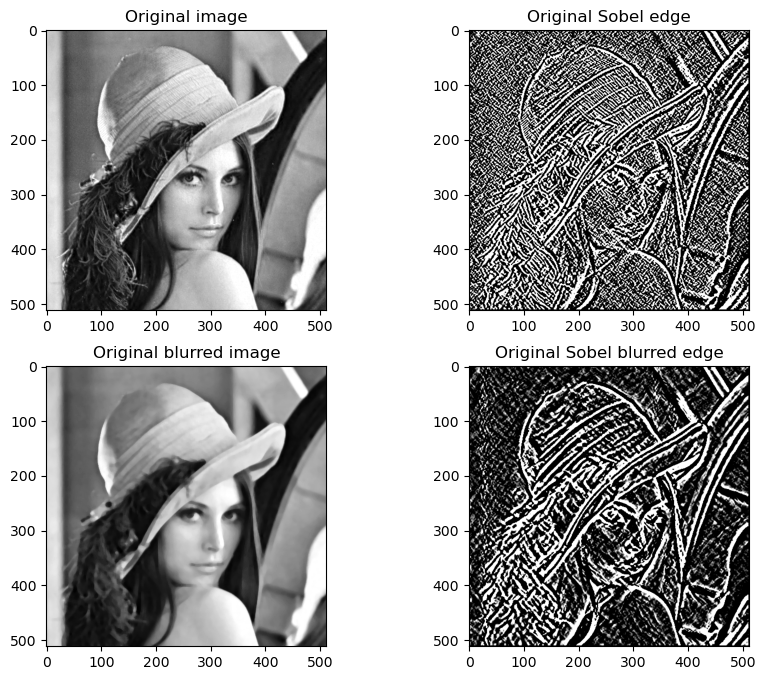

In [13]:
#imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
#img1 = imgBGR[:,:,::-1]
img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.Sobel(img1, -1, 1, 1, 1, 7) 
img3 = cv2.medianBlur(img1, 7)                 # 模糊化，去除雜訊
img4 = cv2.Sobel(img3, -1, 1, 1, 1, 7)      # 偵測邊緣
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,2,2)     
plt.title('Original Sobel edge') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,2,3)     
plt.title('Original blurred image') 
plt.imshow(img3, cmap=plt.cm.gray)
plt.subplot(2,2,4)     
plt.title('Original Sobel blurred edge') 
plt.imshow(img4, cmap=plt.cm.gray)

### 3.13 影像邊緣偵測
#### Laplacian 邊緣偵測
<a href="https://medium.com/ntust-aivc/digital-image-processing-edge-detection-29aa84a8fd60"> Laplacian 邊緣偵測 </a>

#### cv2.Laplacian(img, ddepth, ksize, scale)
img 來源影像     
ddepth 影像深度，設定 -1 表示使用圖片原本影像深度      
ksize 運算區域大小，預設 1 ( 必須是正奇數 )     
scale 縮放比例常數，預設 1 ( 必須是正奇數 )    

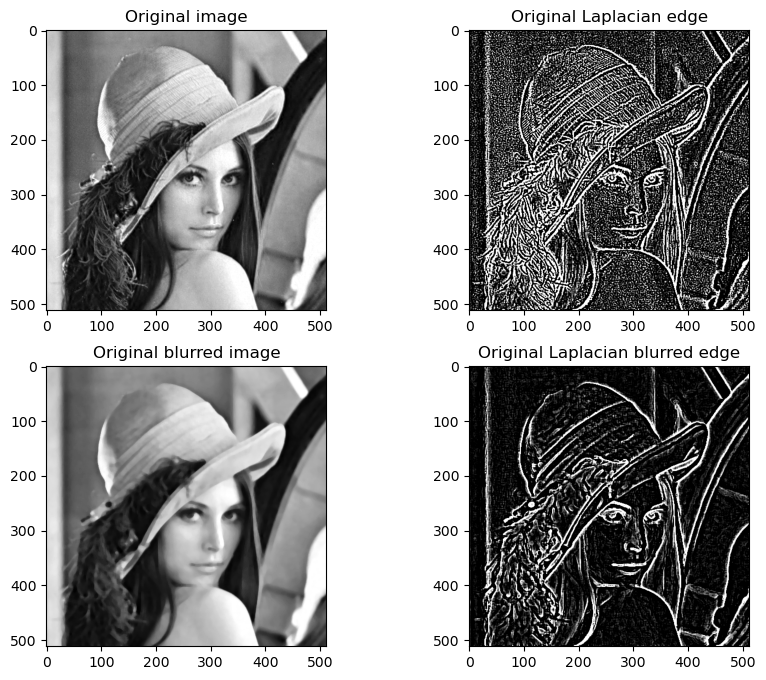

In [14]:
#imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
#img1 = imgBGR[:,:,::-1]
img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.Laplacian(img1, -1, 1, 5)     # 偵測邊緣
img3 = cv2.medianBlur(img1, 7)           # 模糊化，去除雜訊
img4 = cv2.Laplacian(img3, -1, 1, 5)     # 偵測邊緣
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,2,2)     
plt.title('Original Laplacian edge') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,2,3)     
plt.title('Original blurred image') 
plt.imshow(img3, cmap=plt.cm.gray)
plt.subplot(2,2,4)     
plt.title('Original Laplacian blurred edge') 
plt.imshow(img4, cmap=plt.cm.gray)

### 3.14 Canny 邊緣偵測

<a href="https://medium.com/@bob800530/opencv-實作邊緣偵測-canny演算法-d6"> 邊緣偵測懶人包-Canny演算法 </a>


#### cv2.Canny(img, threshold1, threshold2, apertureSize)
img 來源影像    
threshold1 門檻值，範圍 0～255     
threshold2 門檻值，範圍 0～255    
apertureSize 計算梯度的 kernel size，預設 3    

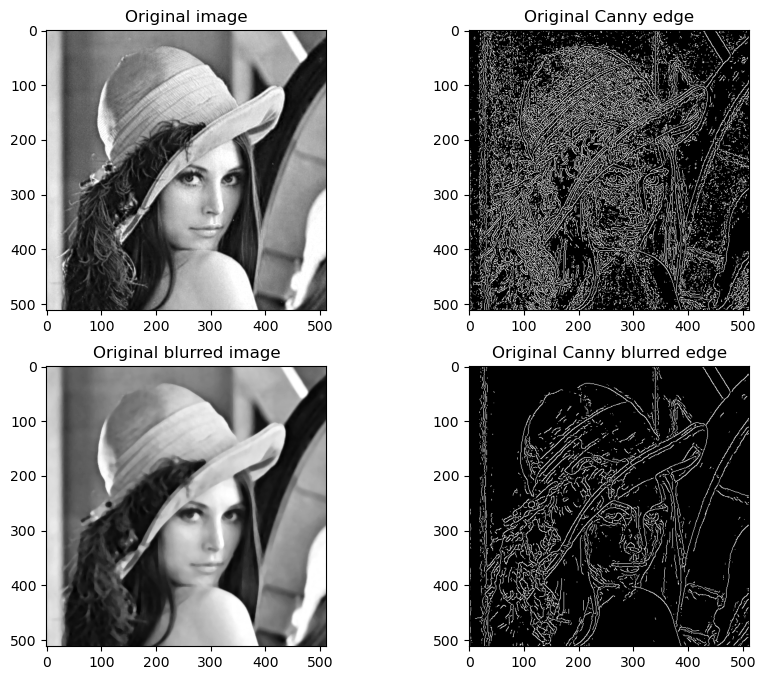

In [15]:
#imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
#img1 = imgBGR[:,:,::-1]
img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.Canny(img1, 36, 36)           # 偵測邊緣
img3 = cv2.medianBlur(img1, 7)           # 模糊化，去除雜訊
img4 = cv2.Canny(img3, 36, 36)          # 偵測邊緣
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,2,2)     
plt.title('Original Canny edge') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,2,3)     
plt.title('Original blurred image') 
plt.imshow(img3, cmap=plt.cm.gray)
plt.subplot(2,2,4)     
plt.title('Original Canny blurred edge') 
plt.imshow(img4, cmap=plt.cm.gray)

### <font color="Red"> 3.15 請找到對 Commons.jpeg 最合適的 Sobel, Laplacian, Canny 邊緣偵測參數

In [16]:
imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
#------------------- Code Here ------------------# 



#------------------- Stop Here ------------------# 

### 3.16 利用 Laplacian 邊界來增強影像
#### cv2.addWeighted(img1, alpha, img2, beta, gamma)
img1 第一張圖    
img2 第二張圖    
計算公式：$img1*alpha + img2*beta + gamma   $ 

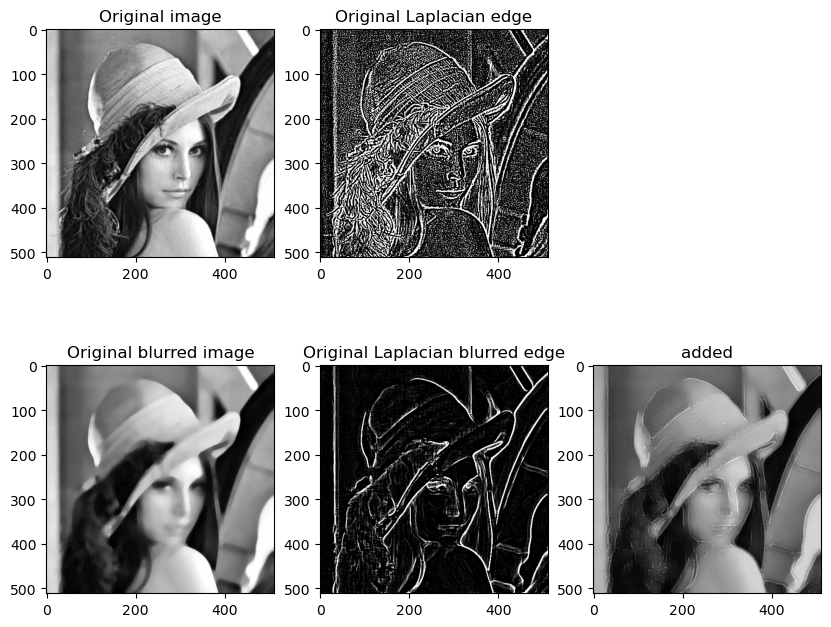

In [17]:
#imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
#img1 = imgBGR[:,:,::-1]
img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.Laplacian(img1, -1, 1, 5)     # 偵測邊緣
img3 = cv2.medianBlur(img1, 15)           # 模糊化，去除雜訊
img4 = cv2.Laplacian(img3, -1, 1, 5)     # 偵測邊緣

img5 = cv2.addWeighted(img3, 0.8, img4, 0.3, 10)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,3,2)     
plt.title('Original Laplacian edge') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,3,4)     
plt.title('Original blurred image') 
plt.imshow(img3, cmap=plt.cm.gray)
plt.subplot(2,3,5)     
plt.title('Original Laplacian blurred edge') 
plt.imshow(img4, cmap=plt.cm.gray)
plt.subplot(2,3,6)     
plt.title('added') 
plt.imshow(img5, cmap=plt.cm.gray)

###  <font color="Red"> 3.17 請利用 Sobel, Canny 邊界來增強 cv2.medianBlur(img, 37) 處理後的 Commons.jpeg 影像

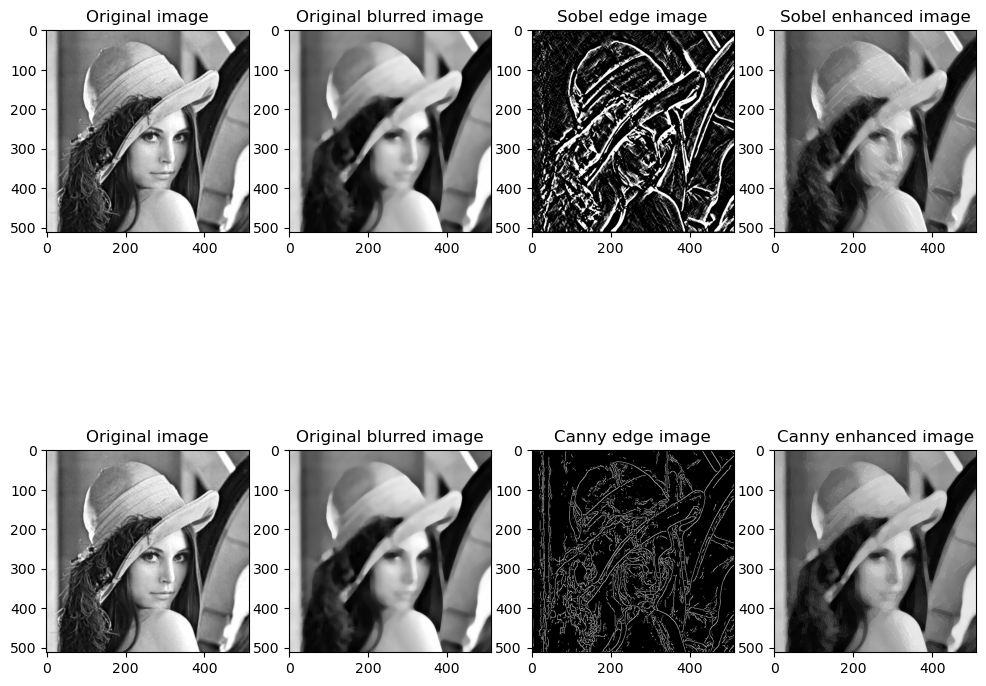

In [18]:
img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.medianBlur(img1, 15)   
#------------------- Code Here ------------------# 

#------------------- Stop Here ------------------# 
plt.figure(figsize=(12,10))
plt.subplot(2,4,1)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,4,2)     
plt.title('Original blurred image') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,4,3)     
plt.title('Sobel edge image') 
plt.imshow(img3, cmap=plt.cm.gray)
plt.subplot(2,4,4)     
plt.title('Sobel enhanced image') 
plt.imshow(img4, cmap=plt.cm.gray)
plt.subplot(2,4,5)     
plt.title('Original image') 
plt.imshow(img1, cmap=plt.cm.gray)
plt.subplot(2,4,6)     
plt.title('Original blurred image') 
plt.imshow(img2, cmap=plt.cm.gray)
plt.subplot(2,4,7)     
plt.title('Canny edge image') 
plt.imshow(img5, cmap=plt.cm.gray)
plt.subplot(2,4,8)     
plt.title('Canny enhanced image') 
plt.imshow(img6, cmap=plt.cm.gray)